# Tugas Project ML 👨‍💻👩‍💻

## 🙆‍♂️🙆‍♀️ Anggota Kelompok:
1. Agnes Triana Cyntianesa	24060120120021
2. Arifa Alif Malicha Khairunnisa	24060120120033
3. Dimas Wahyu Ardiyanto	24060120140159
4. Muhammad Hafizh Roihan	24060120130123
5. Vito Ahmad Husein	24060120140111
6. Zara Zetira Puti	24060120120030

## 🕵️‍♂️ Link Deskripsi Dataset
https://archive.ics.uci.edu/ml/datasets/seeds
## 👩‍🏫 Link Data Dataset
https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
## 👨‍🚒 Alternative (Kaggle)
https://www.kaggle.com/datasets/rwzhang/seeds-dataset

## 📜 Deskripsi Singkat Dataset
##### Dataset ini adalah hasil penelitian terhadap 3 jenis varietas gandum yang berbeda:
- Kama
- Rosa
- Canadian

##### Masing-masing varietas terdapat 70 data yang dipilih secara acak dalam percobaan penelitian dengan menggunakan bantuan sinar-X yang tidak merusak dan alat pencitraan yang canggih.
\
##### Attribute Information:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

\
##### ❗ All of these parameters were real-valued continuous.

## 📚 Import Library 


In [1]:
# Pandas is a Python library for data analysis
import pandas

# Pickle can transform a complex object into a byte stream and it can transform the byte stream into an object with the same internal structure
import pickle

# The KMeans class from the sklearn is a cluster module from the Scikit-learn library is used for k-means clustering
from sklearn.cluster import KMeans

# The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves
from sklearn.metrics.cluster import silhouette_score

# NumPy is a Python library used for working with arrays
import numpy as np

# matplotlib for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

## 📋 Menyiapkan Dataset

In [2]:
# Mendefinisikan link dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Mendefinisikan list berisi kolom - kolom dataset
names=['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient',
                      'lengthOfKernelGroove','seedType']
dataset = pandas.read_csv(url, names=names, header = None, sep = "\s+")

## 🔎 Melihat Data dalam Dataset

In [3]:
dataset

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 🔍 Cek Data yang Bernilai Kosong

In [4]:
dataset.isnull().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

## 🌏 Melihat Distribusi Class Dataset

In [5]:
# Distribusi kelas data
dataset.groupby('seedType').size()

seedType
1    70
2    70
3    70
dtype: int64

## 🧱 Menyiapkan Data

In [3]:
Y = dataset['seedType']                           # Pisahkan label
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values # Pisahkan fitur
Y = np.array(Y)                                   # Ubah dalam bentuk array
print("Array Y = ", Y)                            # Cek nilai Y

Array Y =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


## 📊 Visualisasi Plotting Fitur yang Dipakai untuk Clustering

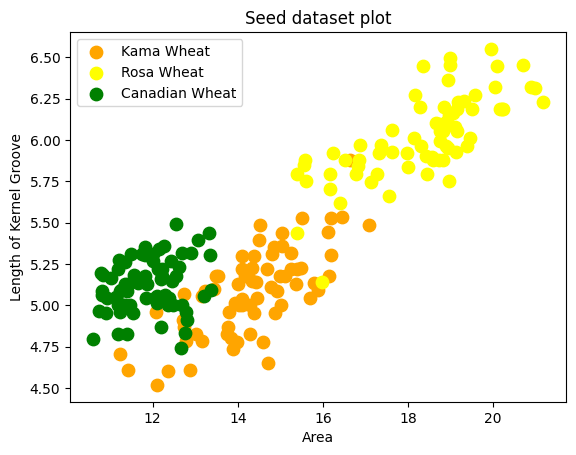

In [26]:
# Gambaran diagram plotting untuk fitur Area(indeks 0) dan lengthOfKernelGroove(indeks 6)
plt.plot()
plt.scatter(X[Y == 1, 0], X[Y == 1, 6], s =80, c = 'orange', label = 'Kama Wheat')
plt.scatter(X[Y == 2, 0], X[Y == 2, 6], s =80,  c = 'yellow', label = 'Rosa Wheat')
plt.scatter(X[Y == 3, 0], X[Y == 3, 6], s =80,  c = 'green', label = 'Canadian Wheat')
plt.title('Seed dataset plot')
plt.xlabel('Area')
plt.ylabel('Length of Kernel Groove')
plt.legend()
plt.show()

## 🔎 Mencari Nilai SSE (sum of the squared errors or deviations)

In [27]:
# Menyimpan nilai SSE untuk setiap k
SSE = []

# Definisi nilai k -> 1-10
K = range(1,11)

# Menghitung SSE
for k in K:
  # Membuat model clustering
  kmeanModel = KMeans(n_clusters=k)
  
  # Fitting model dengan data
  kmeanModel.fit(X)

  # Menghitung nilai SSE
  SSE.append(kmeanModel.inertia_)
  
  # Print nilai SSE
  if (k==1):
    print('k = %d \tSSE = %f \tDelta = %f' % (k, SSE[k-1], 0))
  else:
    print('k = %d \tSSE = %f \tDelta = %f' % (k, SSE[k-1], abs(SSE[k-2]-SSE[k-1])))

k = 1 	SSE = 2719.852410 	Delta = 0.000000
k = 2 	SSE = 1011.712345 	Delta = 1708.140065
k = 3 	SSE = 587.318612 	Delta = 424.393734
k = 4 	SSE = 471.027146 	Delta = 116.291466
k = 5 	SSE = 385.507292 	Delta = 85.519853
k = 6 	SSE = 338.679715 	Delta = 46.827577
k = 7 	SSE = 280.234794 	Delta = 58.444921
k = 8 	SSE = 240.781418 	Delta = 39.453375
k = 9 	SSE = 220.541618 	Delta = 20.239800
k = 10 	SSE = 199.074749 	Delta = 21.466869


## 💪 Visualisasi Elbow Method

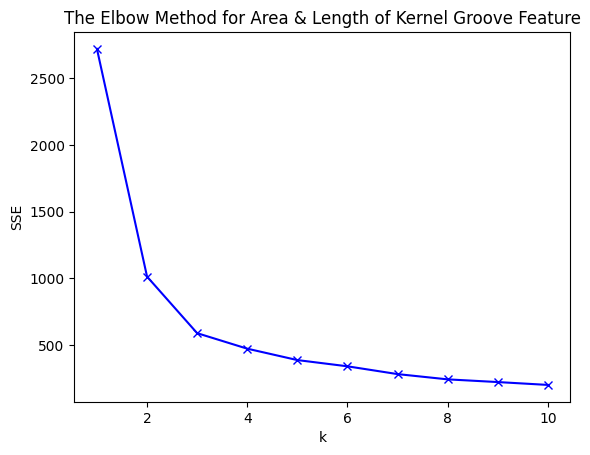

In [28]:
# Membuat Diagram Plotting SSE untuk Setiap K (Elbow)
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method for Area & Length of Kernel Groove Feature')
plt.show()

## 🔨 Melakukan Clustering dengan KMeans

In [30]:
# Melakukan Clustering yang akan fitting dengan input training data
kmeans = KMeans(n_clusters=3).fit(X)

# Mendapatkan cluster labels
labels = kmeans.labels_

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_

# Mencetak Label Prediksi
print("Label prediksi = \n", labels, "\n")

# Mencetak nilai centroid
print("Centroid cluster 0 = \n", C[0], "\n")
print("Centroid cluster 1 = \n", C[1], "\n")
print("Centroid cluster 2 = \n", C[2], "\n")

Label prediksi = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2] 

Centroid cluster 0 = 
 [14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
  5.19231944] 

Centroid cluster 1 = 
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
  6.06609836] 

Centroid cluster 2 = 
 [11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
  5.08851948] 



## 📊 Visualisasi Hasil Clustering

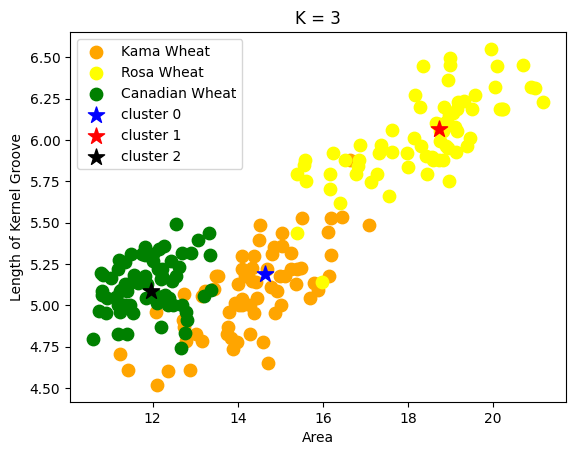

In [31]:
plt.plot()
plt.scatter(X[Y == 1, 0], X[Y == 1, 6], s =80, c = 'orange', label = 'Kama Wheat')
plt.scatter(X[Y == 2, 0], X[Y == 2, 6], s =80,  c = 'yellow', label = 'Rosa Wheat')
plt.scatter(X[Y == 3, 0], X[Y == 3, 6], s =80,  c = 'green', label = 'Canadian Wheat')
plt.scatter(C[0, 0], C[0, 6], marker='*', s=150, c='blue', label = 'cluster 0')
plt.scatter(C[1, 0], C[1, 6], marker='*', s=150, c='red', label = 'cluster 1')
plt.scatter(C[2, 0], C[2, 6], marker='*', s=150, c='black', label = 'cluster 2')
plt.title('K = 3')
plt.xlabel('Area')
plt.ylabel('Length of Kernel Groove')
plt.legend()
plt.show()

## 🎯 Menghitung Nilai Silhoutte

In [32]:
# Evaluasi silhoutte value
silhouette_score(X, labels)

0.4719337319126887

## 🔬 Prediksi Sebuah Data

In [16]:
# Test data diambil dari centroid cluster
test = np.array([ np.array([11.96441558, 13.27480519, 0.8522, 5.22928571, 2.87292208 , 4.75974026, 5.08851948]) ])
kmeans.predict(test)

array([1])

# 🚨 Export Model 

## 🚚 Export Model untuk Dipakai di Website

In [17]:
# Hasil dump akan tampil jika dilakukan lewat Jupyter Notebook
filename='best_model.pkl'
pickle.dump(kmeans, open(filename,'wb'))

## 🛸 Cara Alternatif Export Model (Khusus Colab) - Restricted 🚧

In [ ]:
# Jika dilakukan lewat Google Colab
# import gc
# import pickle
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Export Pickle File
# pick_insert = open('drive/My Drive/data.pickle','wb')
# pickle.dump(data, pick_insert)
# pick_insert.close()

# Import Pickle File (Tidak perlu dipakai)
# pick_read = open('drive/My Drive/data.pickle','rb')
# data = pickle.load(pick_read)
# pick_read.close()

# 🏁 **SELESAI** 🏁